# TMA 01, question 3

**Name**: [Pablo Toledo]
    
**PI**: [C4451553]


In this question, you will examine a set of results of an Open University online quiz (iCMA). These are genuine results from a level 1 module, though the data has been anonymised by using cryptographic hashes to obscure personal information.

The rubric for the iCMA was similar to that for TM351. Students are allowed to take the iCMA as many times as they like, with only their highest score counting. Students have to achieve a threshold score of 40% to pass this iCMA. The iCMA remained open until the module end date. 

The question has several parts, taking you through the data analysis pipeline. Most of the question parts concern with various analyses of the data. The final part of the question looks at some issues with anonymisation of the data.

Record all your activity and observations in this notebook. Generate additional notebook cells as required. 

Ensure that you have made of copy of the TMA01_Question5 Notebook and renamed it so that it has your personal identifier (PI) at the front of the Notebook filename (i.e. YourPI_TMA01_Question5.ipynb). You must submit this notebook as part of your TMA submission.

In [228]:
# Load the necessary libraries here:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# If you require additional libraries to answer any questions 
# then import them as necessary.

## <a name="contents"></a> Contents
* a) [Import and cleaning](#a) (8 marks)
* b) [Number of attempts](#b) (4 marks)
* c) [Timescales](#c) (3 marks)
* d) [Time and day of quiz](#d) (8 marks)
* e) [Difficulty of questions](#e) (7 marks)
* f) [Data investigation summary](#f) (5 marks)
* g) [Anonymisation and privacy](#g) (10 marks)

# <a name="a"></a> a)  Import and cleaning (8 marks) 
([Contents](#contents))

In this part of the question you will load and prepare the data file. You will also quickly examine the data with summaries and visualisations.

Read the csv file `data/icma.csv` into a DataFrame called `icma_df` and display the first 3 rows.

Note that the 'Started on' and 'Completed' columns contain datetimes and should be converted on import. Also not that a single hyphen is used in the file to denote missing numerical data; hyphens should be converted to 'NA' on import.

Also note that it can be easier to see the data if you transpose the dataframe you display: append `.T` to your display function call.

In [229]:
#read icma.csv data into dataframe
icma_df = pd.read_csv('data/icma.csv', parse_dates=['Started on','Completed'], na_values=['-'])
#display first 3 rows
icma_df.head(3).T


,0,1,2
Surname,b7a1c60935d72dd330a48021b25ec0c4,8933e77b83eee991c3d3aae3c88b8176,aa8af604652b6b631f11061fe8c69809
First name,34f9e4c9be637c99f9b2cfb3f5d1994c,d3d2792b4f002c766a99bb7152ccf3ee,ec83707bbca209e51a65e9864ac8baeb
OU Computer Username,b675bd4a9a46ec179a894866ad80b71d,5759a8752ba4984049c0be67c7a6270f,b8fe6559c9ba7bd27819a5460c9359c8
Personal Identifier,ec0b15df629ce1fc564462e81ba6b267,7f30f4954957eb71909d7ec30ccb0e0a,4e74dca9c74ad198eeb162dac5193d9e
Institution,NaN,NaN,NaN
Department,NaN,NaN,NaN
Email address,b3d15cf86ba4dbbafa458124c09ca816,ff9114a689c8e5141f46cf1386b5ba9d,ec01fe85557bab32113d8fbb47b0685d
State,Finished,Finished,Finished
Started on,2016-01-29 06:56:00,2016-01-29 09:14:00,2016-01-29 11:16:00
Completed,2016-02-08 10:31:00,2016-01-30 22:10:00,2016-01-29 11:57:00


Check to see how the columns are typed

In [230]:
# Enter your code here.
icma_df.dtypes

Surname                         object
First name                      object
OU Computer Username            object
Personal Identifier             object
Institution                    float64
Department                     float64
Email address                   object
State                           object
Started on              datetime64[ns]
Completed               datetime64[ns]
Time taken                      object
Grade/20.00                    float64
Q. 1 /1.00                     float64
Q. 2 /1.00                     float64
Q. 3 /1.00                     float64
Q. 4 /1.00                     float64
Q. 5 /1.00                     float64
Q. 6 /1.00                     float64
Q. 7 /1.00                     float64
Q. 8 /1.00                     float64
Q. 9 /1.00                     float64
Q. 10 /1.00                    float64
Q. 11 /1.00                    float64
Q. 12 /1.00                    float64
Q. 13 /1.00                    float64
Q. 14 /1.00              

In [231]:
# Recalculate the 'Time taken' values.
icma_df['Time taken'] = icma_df['Completed'] - icma_df['Started on']
icma_df.head(3).T

,0,1,2
Surname,b7a1c60935d72dd330a48021b25ec0c4,8933e77b83eee991c3d3aae3c88b8176,aa8af604652b6b631f11061fe8c69809
First name,34f9e4c9be637c99f9b2cfb3f5d1994c,d3d2792b4f002c766a99bb7152ccf3ee,ec83707bbca209e51a65e9864ac8baeb
OU Computer Username,b675bd4a9a46ec179a894866ad80b71d,5759a8752ba4984049c0be67c7a6270f,b8fe6559c9ba7bd27819a5460c9359c8
Personal Identifier,ec0b15df629ce1fc564462e81ba6b267,7f30f4954957eb71909d7ec30ccb0e0a,4e74dca9c74ad198eeb162dac5193d9e
Institution,NaN,NaN,NaN
Department,NaN,NaN,NaN
Email address,b3d15cf86ba4dbbafa458124c09ca816,ff9114a689c8e5141f46cf1386b5ba9d,ec01fe85557bab32113d8fbb47b0685d
State,Finished,Finished,Finished
Started on,2016-01-29 06:56:00,2016-01-29 09:14:00,2016-01-29 11:16:00
Completed,2016-02-08 10:31:00,2016-01-30 22:10:00,2016-01-29 11:57:00


`describe()` the `icma_df` DataFrame. (Again, you may find the results easier to see if you transpose `.T` the description.)

In [232]:
# Enter your code here.
icma_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Institution,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time taken,726,16 days 09:30:07.768595,29 days 07:00:03.466198,0 days 00:01:00,0 days 00:35:00,0 days 01:46:00,21 days 18:49:00,154 days 00:58:00
Grade/20.00,726,17.1574,2.75742,1,16.2875,17.765,18.935,20
Q. 1 /1.00,821,0.994348,0.0589023,0,1,1,1,1
Q. 2 /1.00,809,0.949184,0.149324,0,1,1,1,1
Q. 3 /1.00,796,0.895415,0.211043,0,1,1,1,1
Q. 4 /1.00,808,0.884814,0.24743,0,1,1,1,1
Q. 5 /1.00,782,0.903619,0.12584,0,0.89,0.89,1,1
Q. 6 /1.00,761,0.771498,0.247875,0,0.67,0.78,1,1


All iCMA attempts are recorded in the data, whether or not they are finished. The `State` column shows the completion state. What are the different values for State, and how many are in each state? How many questions were answered in each state?

In [233]:
# First we group the table by state, and then apply the count function (we could also use a pivot table
# but the results are the same). 
# If we then transpose the table we can easily see we have 2 kinds of states:'Finished' and 'In progress'
# There are 726 'finished' ones (see Personal Identifier row), and 108 'In progress'
# For each question we can now also see how many questions were answered (e.g. 726 of those students who 
# finished answered question 1, but only 95 who are still in progress have answered question 1)

icma_df.groupby('State').count().T


State,Finished,In progress
Surname,726,108
First name,726,108
OU Computer Username,726,108
Personal Identifier,726,108
Institution,0,0
Department,0,0
Email address,726,108
Started on,726,108
Completed,726,0
Time taken,726,0


Use Pandas `hist()` to generate a histogram of number of tests for each Grade. As the test is out of 20, use 21 bins (0--20 inclusive). Add a suitable title (use `plt.title()`).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xab4e884c>]], dtype=object)

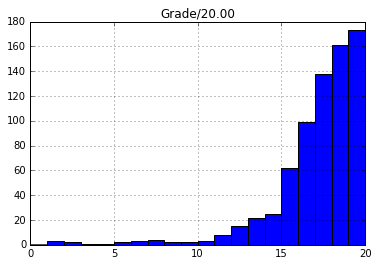

In [234]:
icma_df.hist(column='Grade/20.00', bins=range(21))
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Grade/20')
#plt.ylabel('Total Students')
#plt.title("Total number of tests per grade/20")

The above shows only completed tests. What are the marks awarded for 'In progress' tests?

Hint: Sum the question scores. You need to tell .sum() to add by row, not column. Use `fillna()` to include rows with no answered questions.

array([<matplotlib.axes._subplots.AxesSubplot object at 0xaa75558c>,
       <matplotlib.axes._subplots.AxesSubplot object at 0xaa9ae96c>], dtype=object)

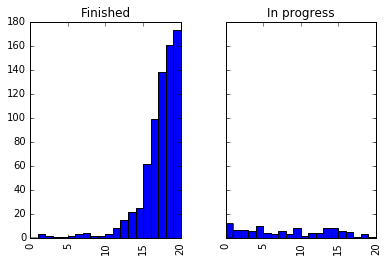

In [235]:
#get list of columns, and discard all non-answer columns
answer_columns = list(icma_df)
answer_columns = answer_columns[12:]  #discard first 12 columns 

# now replace all NaNs with 0s for the answer columns only
icma_df[answer_columns] = icma_df[answer_columns].fillna(0)

# Next, recalculate all the students' scores by summing answer columns for each row, 
# and update grade column with result 
icma_df['Grade/20.00'] = icma_df[answer_columns].sum(axis=1) 

#now we can replot the histogram, and also group by state to compare..
icma_df.hist(column='Grade/20.00', bins=range(21), by=['State'], sharey=True)

**Question:** 
What do these tables and charts tell you?  Comment on:

1. the proportion of complete and incomplete quizzes, and which data is present or missing in which state.

1. the range of values for the time taken.

1. the ranges of the overall grade (`Grade/20.00`) and the marks for individual questions (`Q. 1/1.00` to `Q. 20/1.00`).

1. the distribution of marks of complete and incomplete quizzes.

1. the number of questions answered in quizzes.

**Write your answer here** _(200 words)_
Looking at the table which shows the number of questions answered in each state, we can see that 726 students who finished (87%), and 108 who didn't (13%). 

The table of summary statistics shows us that the average time taken to complete a quiz is 16 days, 9 hours. However, the maximum time taken is an enormous 154 days, which is probably skewing the average. This is supported by a large standard deviation (29 days!), suggesting a highly spread out distribution. This probably suggests different study patterns for different students.

While there is a large range in scores for each question (0 to 1 in most cases),
the average score for each question is very high, with only 2 questions (Q18 and Q20) having a mean score of less than 0.75. Interestingly, one would expect the later questions to have lower scores due to being more difficult, but the data doesn't show this, with some extremely high average marks towards the end of the quiz (such as question 16 with an average of 99%!).

In terms of the distribution of marks, we can see from the histogram that the majority of students scored 15 or above, with the average score for all students being 17.16. Students who didn't finish seemed to score higher in the earlier questions. However, we have to bear in mind that we are unable to tell if students genuinely scored lower in later questions, or if this is because they didn't complete the quiz (in which case we've assumed a score of 0).

We can also see differences in how many students attempted a question, and how many gave up. Q1 for instance, was answered by 821 students (98%), compared to Q18 which was only answered by 709 students (83%).


In [236]:
# For convenience, hold the selectors for the completed and incomplete attempts
finished = icma_df['State'] == 'Finished'
in_progress = ~finished

# e.g. icma_df[finished] is just the rows corresponding to finished attempts.

In [237]:
# For convenience, hold a list of column names that store question marks.
question_columns = ['Q. 1 /1.00', 'Q. 2 /1.00',
       'Q. 3 /1.00', 'Q. 4 /1.00', 'Q. 5 /1.00', 'Q. 6 /1.00', 'Q. 7 /1.00',
       'Q. 8 /1.00', 'Q. 9 /1.00', 'Q. 10 /1.00', 'Q. 11 /1.00', 'Q. 12 /1.00',
       'Q. 13 /1.00', 'Q. 14 /1.00', 'Q. 15 /1.00', 'Q. 16 /1.00',
       'Q. 17 /1.00', 'Q. 18 /1.00', 'Q. 19 /1.00', 'Q. 20 /1.00']

# e.g. icma_df[question_columns] is just the columns for the individual questions

Aspects of the data you will explore further are:

1. how many attempts each student has made

2. how the time taken for the iCMAs affects the score

3. times and dates of starting and finishing iCMAs

4. which questions are harder than others

5. summarising these results and indicating interesting aspects

6. anonymity and privacy of the data

# <a name="b"></a>b) Number of attempts (4 marks)
([Contents](#contents))

Students can make multiple attempts at a quiz. In this part of the question, you will see how many attempts different students made.

Count the number of attempts by each student.

Store the results in a new data frame, `attempt_counts_df`. This new dataframe should have one row for each student, with the columns showing the number of quiz attempts for that student.

In [238]:
# group the icma data by personal identifier - this will be unique for each student
# this gives us a count of attempts by each student
attempt_counts_df = pd.pivot_table(icma_df, index=['Personal Identifier'],aggfunc='count')
attempt_counts_df

,Completed,Department,Email address,First name,Grade/20.00,Institution,OU Computer Username,Q. 1 /1.00,Q. 10 /1.00,Q. 11 /1.00,...,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Started on,State,Surname,Time taken
Personal Identifier,,,,,,,,,,,,,,,,,,,,,
003047356d0f4b451008051bc7580a61,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00a0827e06178d3cc66ca00614da7224,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00a3ecab1901a4df63f7bbe9305c9273,2,0,2,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
00b0749a276fadc59c67593679cdd352,2,0,2,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
00ba4c0d58a2a240bfb77191c790b8a8,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
01679542bebfb044ca81f73848bc322c,0,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
01c01680048094dbaa81a0d2e312c3d5,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
01c05a8732e2091d2aceab53f6bcc87d,0,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
01d33491c7acbbe8f3077413a0975789,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Group `attempt_counts_df` by `Completed` to show the number of students who completed each number of quizzes. (For example, how many students completed no quiz attempts, how many completed 3 attempts, and so on.) Give both the numerical results and a bar chart visualisation.

In [239]:
# pivot again, this time on completed column, count completed and discard all columns apart from one
attempts_summary = pd.pivot_table(attempt_counts_df, index=['Completed'],values=['Email address'],aggfunc='count')
attempts_summary.reset_index(inplace=True) #turn Completed into a regular column, and rename columns
attempts_summary.rename(columns={'Completed':'Quiz Attempts Completed', 'Email address':'Total Students'}, inplace=True)
attempts_summary

,Quiz Attempts Completed,Total Students
0,0,90
1,1,493
2,2,51
3,3,19
4,4,4
5,5,3
6,6,4
7,8,1
8,11,1


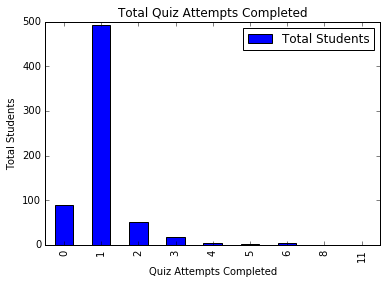

In [240]:
#now plot the above table
attempts_summary.plot.bar(x='Quiz Attempts Completed', title="Total Quiz Attempts Completed")
plt.xlabel('Quiz Attempts Completed')
plt.ylabel('Total Students')

Find the PIs of students that completed the quiz more than five times, and how many times they completed the quiz. Display the results in order of number of completed quizzes.

In [241]:
# Select rows from pivot table where Completed count > 5
# apply a sort by completed
over_5_quiz_attempts = attempt_counts_df[attempt_counts_df['Completed']>5].sort_values(by=['Completed'])
over_5_quiz_attempts['Completed']

Personal Identifier
5355523788afb249175bdb8b1d12380e     6
86a729acd802df7d50607198c2185979     6
c93061b5be7add3dde1d71cf78664b69     6
f09d619892b5f1c63015683b6217fe54     6
8db4ad5565daec67476734944a321ee7     8
de9b3258c50941ba6ff048c203194c8b    11
Name: Completed, dtype: int64

Find the PI of the student who completed the most number of quizzes. Show the datetime and overall grade of their attempts, in datetime order.

In [242]:
#go back to original attempt_counts_df dataframe, and call idxmax method to return the index of the row with the max count
#i.e. the PI of the student with the max number of attempts
most_quiz_attempts_pi = attempt_counts_df.idxmax()
most_quiz_attempts_pi = most_quiz_attempts_pi['Completed']

#now use PI of student with most attempts to select all his / her rows from original dataframe
attempts = icma_df[icma_df['Personal Identifier'] == most_quiz_attempts_pi]
#sort attempts by completed date
attempts.sort_values(by=['Completed'])
#select just the columns we want
attempts[['Completed','Grade/20.00']]

,Completed,Grade/20.00
34,2016-02-04 14:20:00,12.07
88,2016-02-11 15:14:00,12.33
97,2016-02-13 13:21:00,13.11
103,2016-02-14 13:13:00,14.00
105,2016-02-14 14:24:00,17.50
109,2016-02-15 14:47:00,15.45
111,2016-02-15 15:19:00,16.73
112,2016-02-15 15:42:00,16.34
121,2016-02-16 14:43:00,18.62
123,2016-02-16 15:20:00,18.34


Many students started a quiz but did not complete any. What would their scores have been if they had pressed the "submit" button on the quiz? Plot the results as a histogram (with 21 bins).

First, find the PIs of students with zero completed quizzes. 

_Hint:_ The Personal Identifier is the `index` of the `attempt_counts` DataFrame. Store the relevant Personal Identifiers in a variable called `zero_attempted`.

In [243]:
# first, select rows with completed count of 0
zero_attempted = attempt_counts_df[attempt_counts_df['Completed']==0]
# next, grab the index column (which is the student PI)
zero_attempted = zero_attempted.index
zero_attempted

Index(['01679542bebfb044ca81f73848bc322c', '01c05a8732e2091d2aceab53f6bcc87d',
       '065f17ebad6c6258dd55293d7efbf4b5', '0826a6d1da7c62e82c22d7ff4bc6c697',
       '0d5b2caddd3153ba426efecc6bdd9f05', '0fac3c1704877efe52fddc6e1162e5c3',
       '1198ef963362eb127f888e263a012daf', '1352e5ad87b7171858b955d02cf4b5f4',
       '13a5cd6605cb7f8c09fa812bdf575184', '17a3d70bad7c6a0355a9c65e6f694e05',
       '181b6b7816deae79627a1a4942ec1189', '184995ce7ac197b6752aac38c4072ebd',
       '1fa06ea1b35d1b360f9a8c1395e07f6a', '228cb5a4d543bfa880d7d90bdb4d15e2',
       '245ec7644f5159c297eb2b1b82965be1', '256dce1fd1523049b0da537a408909b3',
       '25c8e17fe87b1b47294e65ac8755ea09', '29011958b5531db313faa15ac46018b2',
       '2ea13f5044a777bb718bd38879d90344', '31e9d5931045f0eb995e89e2ca4e5bfb',
       '35635ff8e5cc20633c4ffa11380a4af6', '3739ccdfa542a82f0522506d7aa115c7',
       '3830174918e12839f30698416a4af9a3', '38d51786877591180a4f1446f09642fb',
       '3d32c15b73037fde7c93ca7ddba88206', '3dddb096

The code below will select the rows of the `icma_df` DataFrame where the Personal Identifier is in the `zero_attempted` set you just identified. Use it to find the scores each of these quiz attempts would have been awarded had the student simply pressed 'submit'. Plot those results as a histogram (with 21 bins).

Ensure you find the total per student, not the total per question.

In [244]:
unsubmitted_attempts = icma_df[icma_df['Personal Identifier'].isin(zero_attempted)]
unsubmitted_attempts

,Surname,First name,OU Computer Username,Personal Identifier,Institution,Department,Email address,State,Started on,Completed,...,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00,Q. 16 /1.00,Q. 17 /1.00,Q. 18 /1.00,Q. 19 /1.00,Q. 20 /1.00
6,1b4a4ba779ce44b1d2ce658bbd199c14,7130f665bca85623df6944f349e4080f,b17eb52dd4e580b58e100385d233f43f,764a7ed54722cc17343ce5ef34cbb0b7,NaN,NaN,6deb878c8a8c61dbd6ab30ff5e257c34,In progress,2016-01-29 16:03:00,NaT,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,c574d948293e2fce20f1d2c3ad2e7c52,6225db62f77fbf8cd896ab214c1b183d,23c673e072ed1924fba62f4a7232517d,a655111f433d5b2644ed7b00163481ea,NaN,NaN,e0af3fee19091b96f12c4069c4f57330,In progress,2016-02-03 14:09:00,NaT,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57,a551255aba280834b0f4800d42ef1bda,ac0592b0dcb141b624b6512c3a5a207e,06a4b1369c11daa16485aa3f730dabd8,e69b9f4756e7335b4bdc6db6946107d8,NaN,NaN,611f6cf5227af7e6d7be14439cf4f163,In progress,2016-02-07 16:31:00,NaT,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
70,6627906f306950b8d77614a198c6ebd7,3949260500a1a05c4cd3a97a4b35f9f4,b671ea725339c123fad85e9d047db3cd,f8b632943dbee103b4a2668c26049ac7,NaN,NaN,de012fde4773590eef41ebd0299a2f85,In progress,2016-02-08 22:36:00,NaT,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
90,ff99f61214c921e5a2ccc1acdadacc78,88c23c38cef5a19b543da3c08d7636bb,2772042445231475461d597c693ffb43,29011958b5531db313faa15ac46018b2,NaN,NaN,de1de4e52f5422814697798822451221,In progress,2016-02-11 21:20:00,NaT,...,1.00,1.00,1.00,0.33,0.00,1.00,0.67,1.00,0.00,0.83
92,966bf06d585f2a4c0680f3dec8da7bca,3900772a0dc83c545ff5e17f08cebf9e,c811c39c572bd96cd763bcc1f558ab00,e1afc97c387751b8c72030ced7953018,NaN,NaN,b80250de7827923c28dc44527740641b,In progress,2016-02-12 19:11:00,NaT,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
93,75ecbcc2ee1ecdf832183cdb019fa07c,10b36dc315e8669cb5d6a31ef431be67,3c46c0327185cbf559cab29cb549fed2,d383cad8d552206ef886abc24db73167,NaN,NaN,88145b9ec2ea47edae3cdc29007113a8,In progress,2016-02-12 19:21:00,NaT,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
99,a0df726b4cab6f7c18bb05c0e697b865,10aab2ffe5e17184ab06b2c388811e11,5539a407ac9357730a9ef187aeef6818,3830174918e12839f30698416a4af9a3,NaN,NaN,8f176e336a6ae224dbffb09138b259eb,In progress,2016-02-13 17:17:00,NaT,...,1.00,0.89,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
110,adf1a5fdec02079b63e310a4236c0479,9e2f6a17030dd80c1c4267e17e494835,ba4e4c20bce7ee0d33475363a485f4d6,13a5cd6605cb7f8c09fa812bdf575184,NaN,NaN,47511ef37fe5b31bb28a26bfe7bf8cdf,In progress,2016-02-15 14:30:00,NaT,...,1.00,1.00,1.00,0.67,0.89,1.00,1.00,0.00,0.00,0.58
115,fea016e501612657bebc4d48d0abd55f,be9f54fd90c1265489eed9c23d485487,2a2786b0981c2c32c3b5398256f970c9,0826a6d1da7c62e82c22d7ff4bc6c697,NaN,NaN,7987deae3659b35ffc729bf60e33096f,In progress,2016-02-15 17:35:00,NaT,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xaa9ecd6c>]], dtype=object)

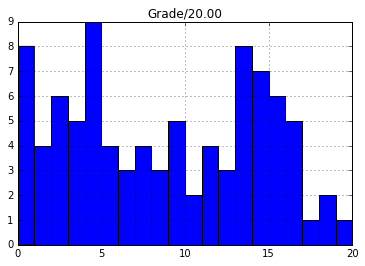

In [245]:
#we simply select the grade/20 column from unsubmitted_attempts and plot this, as we've already 
#set the score of non-answered questions to 0 and recalculated the total score 
unsubmitted_attempts.hist(column='Grade/20.00', bins=range(21))
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Grade/20')
#plt.ylabel('Total Students')
#plt.title("Grade/20 for students who didn't submit test")

## Analysis
What do these graphs and data extracts tell you about how students take quizzes?

**Write your answer here** _(100 words)_
These graphs and data tell us that while most students (74%) attempt and complete the quiz just once, there are a sizable proportion (13.5%) that attempt the quiz but don't complete it, even though by doing so they might have attained a reasonable grade (15 students who didn't click submit would have scored 15/20 or higher). Conversely 12% of students complete the quiz multiple times in order to gain a higher score. One student even completed the quiz 11 times, increasing his/her score from 12 to 19. These results probably show differing study patterns in students, with some more motivated than others to score highly on the ICMAs. These results could also indicate students who have completed a quiz, but simply forgot to press submit.

# <a name="c"></a> c) Timescales (3 marks)
([Contents](#contents))

Does the time taken to complete a quiz have any bearing on the score for that quiz attempt? In other words, does taking your time over a quiz lead to a higher mark, or vice versa?

Add a new column to the `icma_df` DataFrame that holds the number of hours for that quiz attempt. 

The 'Time taken' data are `timedelta` objects. The `.total_seconds()` method of `timedelta` gives the number of seconds in that time interval. You will need to `.apply()` that function to every row of the `icma_df` DataFrame.

`describe` the distribution of times. Plot a histogram of number of quiz attempts against time taken.

In [246]:
# create a new 'Hours taken' column based on 'Time taken', and apply function to divide 
# time delta (i.e. a time period) by a 1 hour time delta, to find the number of hours
icma_df['Hours taken'] = icma_df['Time taken'].apply(lambda x: x / np.timedelta64(1, 'h'))

#now describe the distribution of times
icma_df['Hours taken'].describe()

count     726.000000
mean      393.502158
std       703.000963
min         0.016667
25%         0.583333
50%         1.766667
75%       522.816667
max      3696.966667
Name: Hours taken, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa93d4b8c>]], dtype=object)

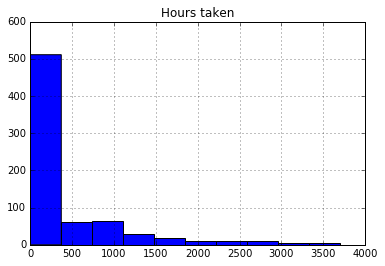

In [247]:
# now plot a histogram of the hours taken
icma_df.hist(column='Hours taken')
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Hours taken')
#plt.ylabel('Total Students')
#plt.title("Number of hours taken to complete each test")

Many quizzes are completed quickly. How many are completed in less than two hours? Plot a histogram of number of quizzes completed by time. Include only the quizzes completed in less than two hours, and use 40 bins to show the detail.

In [248]:
#select all rows where hours taken < 2
quizzes_under_2_hours = icma_df[icma_df['Hours taken']<2]
quizzes_under_2_hours

,Surname,First name,OU Computer Username,Personal Identifier,Institution,Department,Email address,State,Started on,Completed,...,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00,Q. 16 /1.00,Q. 17 /1.00,Q. 18 /1.00,Q. 19 /1.00,Q. 20 /1.00,Hours taken
2,aa8af604652b6b631f11061fe8c69809,ec83707bbca209e51a65e9864ac8baeb,b8fe6559c9ba7bd27819a5460c9359c8,4e74dca9c74ad198eeb162dac5193d9e,NaN,NaN,ec01fe85557bab32113d8fbb47b0685d,Finished,2016-01-29 11:16:00,2016-01-29 11:57:00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.683333
3,615bbea6dd8739d5aea38087d86175ea,19f2b4e849a31f6f0c43781e40fe14a5,18f13b6a9d7fccaf6b4ee35e380f3da2,94a997d5af26916f52f3a8bc4c88cc89,NaN,NaN,860dd783e86cac9751dde00e1319c9b9,Finished,2016-01-29 12:08:00,2016-01-29 12:51:00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.716667
7,fe0a1584a31c05fc75c52f7fd539fc0c,ac6e926ec3ef752a634271124d6328e7,564b23a00ad9052da59f54f1c3c56c8e,28ef47c2253e325c478698287ece1029,NaN,NaN,22704ac9f42eeb956e3b72c8243c255c,Finished,2016-01-29 22:07:00,2016-01-29 22:51:00,...,1.00,1.00,1.00,0.89,1.00,1.00,1.00,1.00,0.50,0.733333
9,1209bb7c8834eac267c8c79c7cf0adb0,4360e2dcc2592270feb9da346e64a495,4d59ddec2fe415e72c133d6e4ed8ae74,cd0618a9ae302e56f5e5d151378e6e58,NaN,NaN,0dfbd8431e881fef15fd6785ad8c2f4d,Finished,2016-01-30 13:28:00,2016-01-30 13:44:00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.266667
11,c201bd2ac4e934165ef71882b28d4fe3,33957e81e4dc94e74fb958ff1ce34e4e,fff8aafa0b17b1c0fe1e53c0947d4b81,b8449b69715271304f341ebeb0003fdf,NaN,NaN,b236c677b536dd1a592ca1da2e7aedce,Finished,2016-01-30 16:12:00,2016-01-30 16:40:00,...,0.89,1.00,1.00,0.89,1.00,1.00,0.00,0.44,0.92,0.466667
12,8933e77b83eee991c3d3aae3c88b8176,d3d2792b4f002c766a99bb7152ccf3ee,5759a8752ba4984049c0be67c7a6270f,7f30f4954957eb71909d7ec30ccb0e0a,NaN,NaN,ff9114a689c8e5141f46cf1386b5ba9d,Finished,2016-01-30 22:20:00,2016-01-30 22:36:00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.266667
13,cad2ee9ce762fd64e8235c070706f2d0,b0197af0bb2c037fd5c6bbe840b06c6b,9a0c46024ca1ab2cc18aec172bbfbc9d,c93061b5be7add3dde1d71cf78664b69,NaN,NaN,09b9d82717ca0c18f0cf58615c8d3efe,Finished,2016-01-31 08:47:00,2016-01-31 09:27:00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.83,0.666667
14,fc923dd175c9c06984df402f39ed0ab0,529131b502682340edc778ed6d24c134,ddb8b3f6cd12b8667f619444c4644d90,107d2e3e45ee6f04308b9f0c5a20caf4,NaN,NaN,7e938138a62102a0db2bec13e8167142,Finished,2016-01-31 10:53:00,2016-01-31 12:01:00,...,1.00,1.00,0.00,0.89,1.00,1.00,0.67,0.89,0.00,1.133333
16,f2e29b6dc252b243a626b0d8c44e1608,de425c58493063ed07bcc28a0b7d8e40,ebad0a4f525401d570ae6af382244b74,9cbbf8c73e350590adc27b89268eacc6,NaN,NaN,8ef21cebedf1f002552adf07f7e32e1f,Finished,2016-01-31 21:58:00,2016-01-31 22:25:00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.33,1.00,1.00,0.450000
17,1f0a357744ee3b1a21d568e733edccfe,41a8d5bf5bb0a30b1dca315181dc3eb9,2016486e0f4f0dc6858b01aba16c3510,ee089b4af0720857d9260689648d42bb,NaN,NaN,da291a563204563cb0cb8de9f851536f,Finished,2016-01-31 22:21:00,2016-01-31 22:46:00,...,1.00,1.00,1.00,0.11,1.00,1.00,1.00,1.00,0.33,0.416667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa9292bec>]], dtype=object)

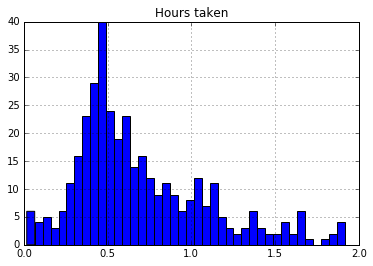

In [249]:
#plot histogram of hours taken with bin size of 40
quizzes_under_2_hours.hist(column='Hours taken', bins=40)
#NB plt.title, plt.xlabel and plt.ylabel don't work here. Unable to find solution online. 
#plt.xlabel('Hours taken')
#plt.ylabel('Total Students')
#plt.title("Number of hours taken to complete each test (for attempts less than 2 hours long)")

Plot scatter plots of time taken against grade, for all attempts and for attempts completed within two hours.

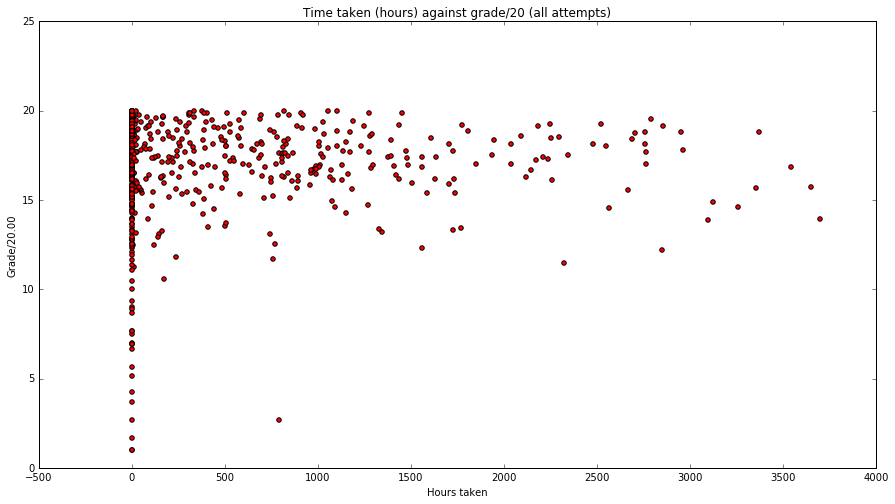

In [250]:
# scatter plot of time taken against grade for all attempts
icma_df.plot.scatter(x='Hours taken', y='Grade/20.00', 
                     color='red', 
                     title="Time taken (hours) against grade/20 (all attempts)",
                     figsize=(15,8))

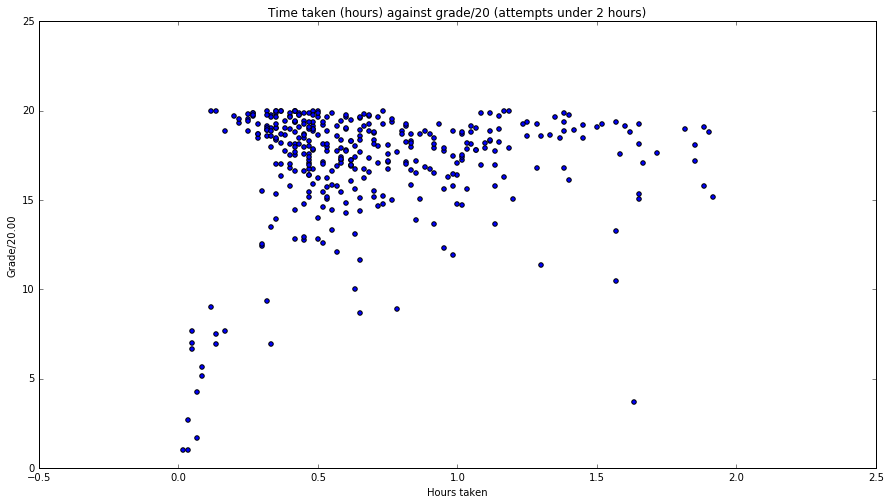

In [251]:
# scatter plot of time taken against grade for attempts less than 2 hours
quizzes_under_2_hours.plot.scatter(x='Hours taken', y='Grade/20.00', 
                     color='blue', 
                     title="Time taken (hours) against grade/20 (attempts under 2 hours)",
                     figsize=(15,8))

## Analysis
What does these plots and summaries of the data tell you about how the time to complete a quiz affects the score of that quiz?

**Write your answer here** _(100 words)_
From looking at scatter graphs we can clearly see that the majority of students complete their tests quickly (50% of students within 1.76 hours, 75% of students within 523 hours), and score highly (between 15 and 20). In the 2 hour scatter graph we can also see a clustering of high results around the half hour mark, with the grade falling slightly between half hour and 2 hours. In the other scatter graph we see this pattern more clearly, with the grade visibly dropping as the number of hours increases. Its also interesting to note that the grade also drops for students that completed within the first half hour. The later results could be explained by students leaving it too long to take the quiz, by which point they have forgotten the material. The former could conversely be explained by students rushing to complete the test and not taking the required time to recap the material.

# <a name="d"></a> d) Time and day of quiz (8 marks)
([Contents](#contents))

Does when a quiz is started or finished have any effect on its grade?

_Pandas_ doesn't like making scatter plots with time as one axis. This code will convert the start time of a quiz into an integer (number of seconds), add it to the `icma_df` DataFrame, then draw a scatter plot.

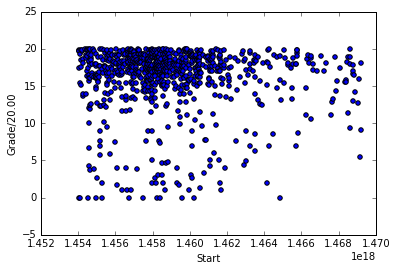

In [252]:
icma_df['Start'] = icma_df['Started on'].astype(np.int64)
icma_df.plot.scatter(x='Start', y='Grade/20.00')

Make a scatter plot of completion time against score.

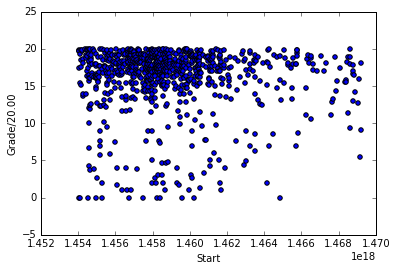

In [253]:
icma_df['End'] = icma_df['Completed'].astype(np.int64)
icma_df.plot.scatter(x='Start', y='Grade/20.00')

In [254]:
# The following line of code maps dates to day of the week with Monday=0, Sunday=6
icma_df['DoW'] = icma_df['Started on'].dt.weekday
icma_df[:3].T

,0,1,2
Surname,b7a1c60935d72dd330a48021b25ec0c4,8933e77b83eee991c3d3aae3c88b8176,aa8af604652b6b631f11061fe8c69809
First name,34f9e4c9be637c99f9b2cfb3f5d1994c,d3d2792b4f002c766a99bb7152ccf3ee,ec83707bbca209e51a65e9864ac8baeb
OU Computer Username,b675bd4a9a46ec179a894866ad80b71d,5759a8752ba4984049c0be67c7a6270f,b8fe6559c9ba7bd27819a5460c9359c8
Personal Identifier,ec0b15df629ce1fc564462e81ba6b267,7f30f4954957eb71909d7ec30ccb0e0a,4e74dca9c74ad198eeb162dac5193d9e
Institution,NaN,NaN,NaN
Department,NaN,NaN,NaN
Email address,b3d15cf86ba4dbbafa458124c09ca816,ff9114a689c8e5141f46cf1386b5ba9d,ec01fe85557bab32113d8fbb47b0685d
State,Finished,Finished,Finished
Started on,2016-01-29 06:56:00,2016-01-29 09:14:00,2016-01-29 11:16:00
Completed,2016-02-08 10:31:00,2016-01-30 22:10:00,2016-01-29 11:57:00


How many quiz attempts were started on each day of the week? What were the average scores of those completed quiz attempts?

Show the numeric results of each of these questions, and produce a bar chart of the results.

Make a scatter plot of day of week against score.

In [255]:
# Show the number of quizzes started on each day of the week.
quizzes_by_dow = pd.pivot_table(icma_df, index=['DoW'], values=['Started on'], aggfunc='count')
quizzes_by_dow

,Started on
DoW,
0,135
1,123
2,132
3,133
4,104
5,89
6,118


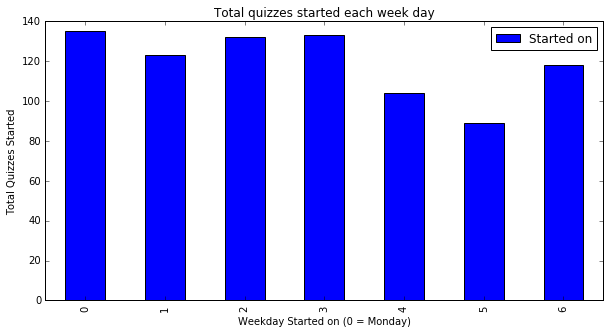

In [256]:
# Plot the results above as a bar chart.
quizzes_by_dow.plot.bar(title="Total quizzes started each week day",
                        figsize=(10,5),
                        color='blue')
plt.xlabel('Weekday Started on (0 = Monday)')
plt.ylabel('Total Quizzes Started')


In [257]:
# Show the mean score of quizzes started on each day of the week.
mean_quiz_score_by_dow = pd.pivot_table(icma_df, index=['DoW'], values=['Grade/20.00'], aggfunc='mean')
mean_quiz_score_by_dow

,Grade/20.00
DoW,
0,16.388593
1,16.093984
2,15.744621
3,15.585714
4,15.791635
5,15.662135
6,16.618051


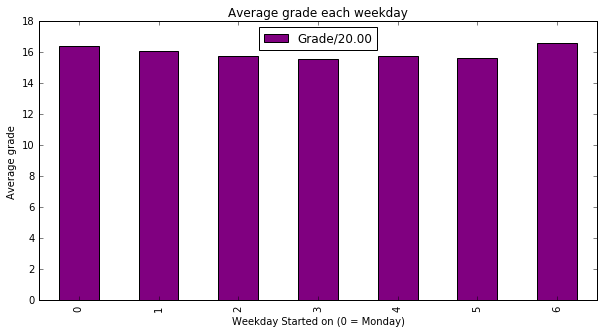

In [258]:
# Plot the results above as a bar chart.
mean_quiz_score_by_dow.plot.bar(title="Average grade each weekday", 
                               figsize=(10,5),
                               color='purple')
plt.xlabel('Weekday Started on (0 = Monday)')
plt.ylabel('Average grade')


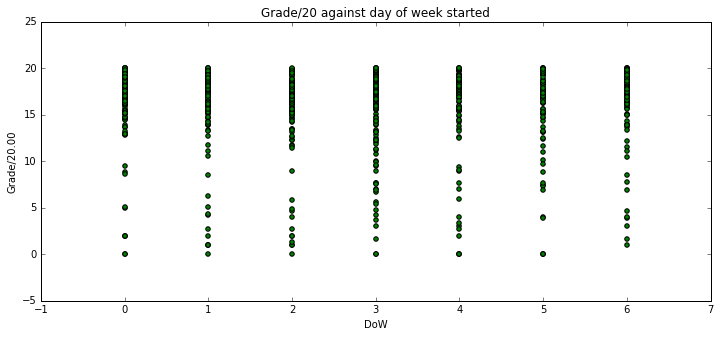

In [259]:
# Plot the results above as a scatter chart, of grade against day of week.
icma_df.plot.scatter(x='DoW', y='Grade/20.00', 
                     color='green', 
                     title="Grade/20 against day of week started",
                     figsize=(12,5))

Perform the same analysis for time of day. Find the hour that each quiz was started, and give numerical and graphical representations of the number of quizzes completed each hour and their average score. Use intermediate steps as needed.

In [260]:
#add new column, 'Hour started', calculated in the same way as day of week started
icma_df['Hour started'] = icma_df['Started on'].dt.hour


In [261]:
#check new column to make sure it looks sensible
icma_df[['Started on', 'Hour started', 'DoW']].head(5)

,Started on,Hour started,DoW
0,2016-01-29 06:56:00,6,4
1,2016-01-29 09:14:00,9,4
2,2016-01-29 11:16:00,11,4
3,2016-01-29 12:08:00,12,4
4,2016-01-29 12:51:00,12,4


In [262]:
#now lets get the number of quizzes started each hour:
quizzes_by_hour = pd.pivot_table(icma_df, index=['Hour started'], values=['Started on'], aggfunc='count')
quizzes_by_hour

,Started on
Hour started,
0,14
1,13
2,1
3,5
4,4
5,7
6,8
7,15
8,17


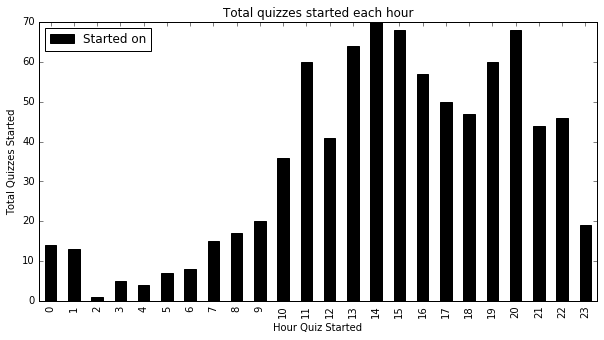

In [263]:
# Plot the results above as a bar chart.
quizzes_by_hour.plot.bar(title="Total quizzes started each hour",
                        figsize=(10,5),
                        color='black')
plt.xlabel('Hour Quiz Started')
plt.ylabel('Total Quizzes Started')

In [264]:
#now lets calculate the mean score for every hour the quiz was started
mean_quiz_score_by_hour = pd.pivot_table(icma_df, index=['Hour started'], values=['Grade/20.00'], aggfunc='mean')
mean_quiz_score_by_hour

,Grade/20.00
Hour started,
0,16.025714
1,16.346154
2,17.430000
3,18.872000
4,17.310000
5,14.474286
6,16.341250
7,13.199333
8,16.137059


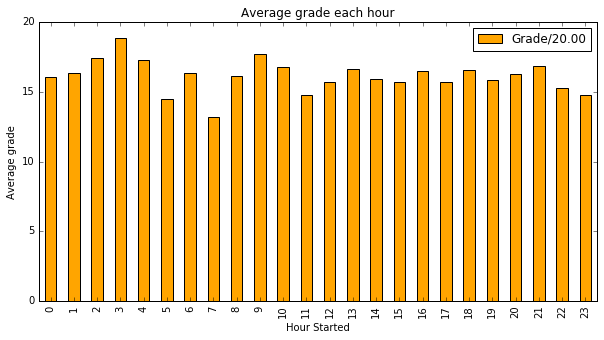

In [265]:
#and finally, lets plot the above table in a bar chart
mean_quiz_score_by_hour.plot.bar(title="Average grade each hour", 
                               figsize=(10,5),
                               color='orange')
plt.xlabel('Hour Started')
plt.ylabel('Average grade')

Do the complete and incomplete quiz attempts have a different distribution of starting times?

Generate two plots in one figure, with the finished quiz times above the in-progress quiz times. Give each plot a title and perhaps a different colour. (Keeping calls of 
```
plt.tight_layout()
fig.subplots_adjust(top=0.90)
```
to the very end of your code cell can improve the layout.)

Use `reindex()` and `fillna()` to fill in any missing groups so that both graphs have the same number of data points.

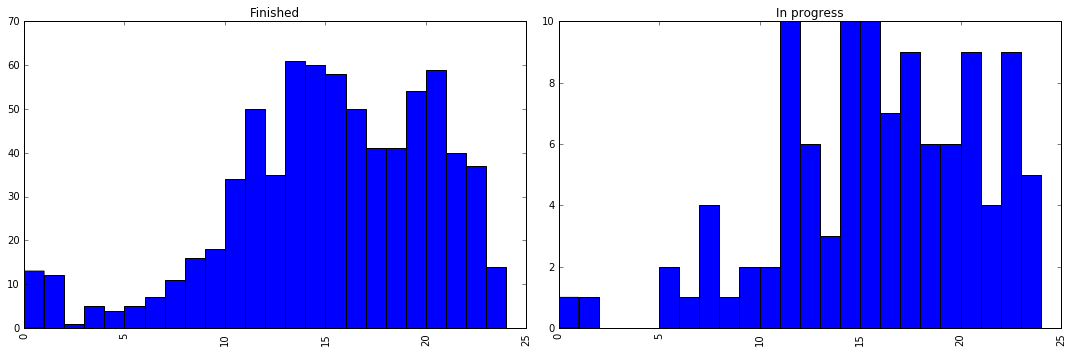

In [266]:
#I don't understand the need for fillna() and reindex here. Perhaps I've missed something, but 
#all quiz attempts have a value for 'Started on' and hence a 'Hour started' value. If we use 
#the hist function we can see how tests are distributed across hour started, and we can further
#compare finished to in progress tests by grouping by 'state'.

fig = plt.figure(figsize=(8, 8))
fig.suptitle("Attempts by hour", fontsize='x-large')

icma_df.hist(column='Hour started', 
             bins=range(25), 
             by=['State'],
             figsize=(15,5))

# Keep these lines at the end
plt.tight_layout()
fig.subplots_adjust(top=0.90)

## Analysis
What does these plots and summaries of the data tell you about how the time of day quiz affects the score of that quiz?

**Write your answer here** _(150 words)_
The time of day doesn't seem to be a significant factor in the grade obtained. The (orange) chart which shows the average grade / hour does seem to peak at 3am, and 9am, and dip at around 7am. However, when we look at the distribution of start times we can clearly see the peak time which students choose to take their tests are between 12 and 3pm, and again between 7 and 8pm. This seems to be true for both complete and incomplete quizzes (see blue histogram). The 3am peak in average grade obtained is therefore based on a small number of students (5 or so), and so can be ignored as the only thing it tells us is that a small number of students work best in the middle of the night! 

There seems to be another peak of average score at around 9am. This could indicate that students perform better when tested in the morning, but again this is only based on around 20 or so students which is too small a sample (compared to the other students tested) to draw any conclusions. In the end it may only tell us that some students are 'morning people'.

Ultimately, I think this data reflects that there are a mixture of study patterns which suit different students - some work best in the morning, others in the middle of the night. Most students however, will take their tests between 12 and 3pm, or 7 and 8pm, and performance seems reasonably similar regardless.  

# <a name="e"></a> e) Difficulty of questions (7 marks)
([Contents](#contents))

Which questions are harder? 

Note that we can judge difficulty in two ways: lower grades for particular questions, or fewer questions answered (students tend to avoid questions they perceive as difficult).

Generate graphs to show the number of scores for each question. Generate three graphs, for all attempts, completed quizzes, and in-progress quizzes. 

Plot the three graphs, one above the other, in one figure. Give each subplot a title and use different colours for each plot. Again, `plt.tight_layout()` and `fig.subplots_adjust()` may improve the appearance.

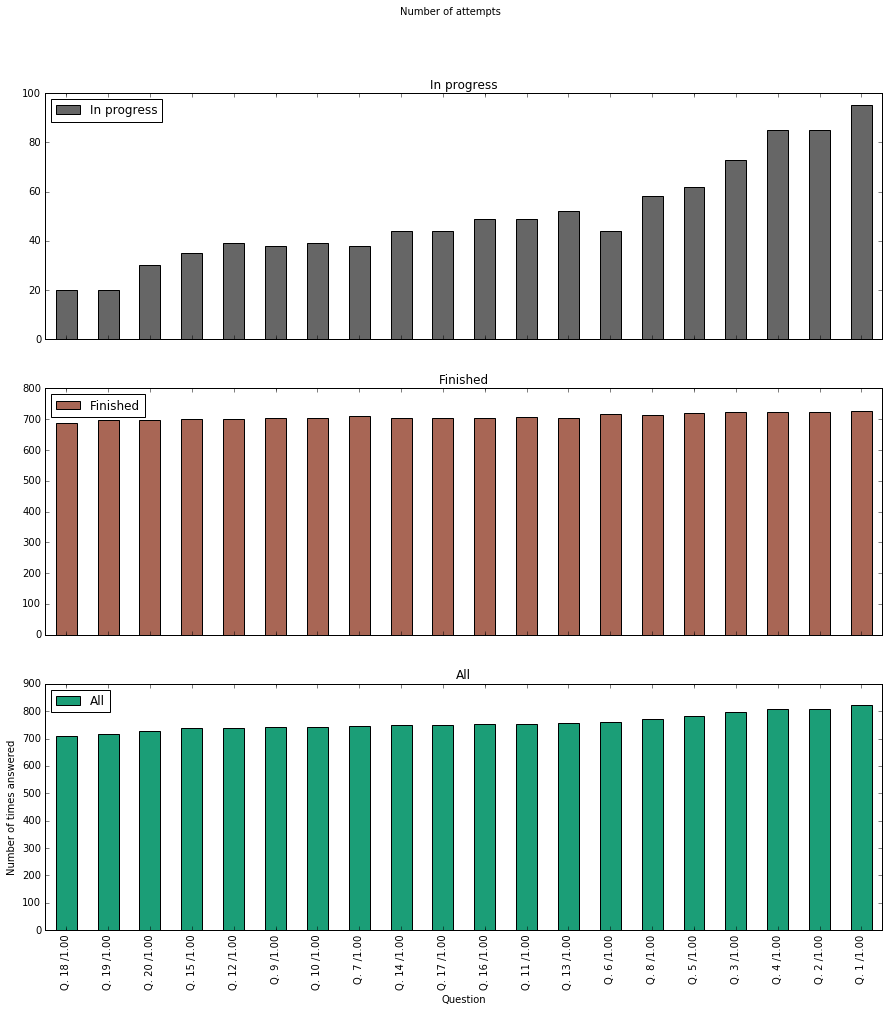

In [328]:
#firstly, we need to read in the csv file again, as we've already filled NA values with 0
#we need to go back to the raw data, so we can count the number of non-null (i.e. answered)
#values for each question

icma_df = pd.read_csv('data/icma.csv', parse_dates=['Started on','Completed'], na_values=['-'])

#now we can pivot on state, sum all non-NA values, and just report on the question colums
#margins=true gives us a total column
questions_answered = pd.pivot_table(icma_df, index=['State'], values=question_columns, aggfunc='count', margins=True)

#we need to transpose the table, to get the questions on the bottom.
questions_answered = questions_answered.T
#we need to reset the index to be able to use the question column
questions_answered.reset_index(inplace=True)
questions_answered.rename(columns={'index':'Question'}, inplace = True)
#lets sort the results by average score to make it easier to interpret the graph
questions_answered.sort_values(by='All', inplace=True)
#now we can plot the number of scores for each question
questions_answered.plot.bar(title="Number of attempts", 
                               x=['Question'],
                               y=['In progress', 'Finished', 'All'],
                               figsize=(15,15),
                               subplots=True,
                               colormap='Dark2_r')
plt.xlabel('Question')
plt.ylabel('Number of times answered')

Create a scatter plot that shows the number of questions answered (_x_ axis) against the grade for that quiz attempt (_y_ axis). You may find it easier to add a column to the `icma_df` DataFrame to store the number of attempted questions.

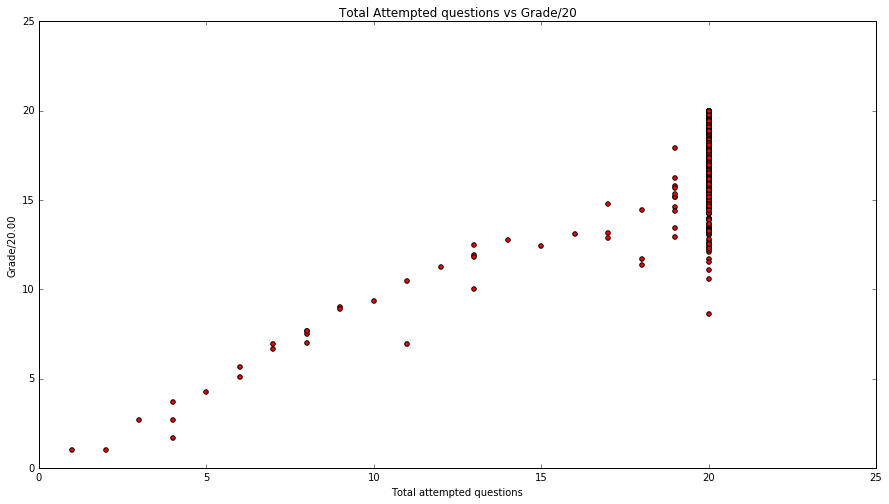

In [308]:
# first, lets create a new column 'Total attempted questions' 
icma_df['Total attempted questions'] = icma_df[question_columns].count(axis=1)

# Plot the results above as a scatter chart, with no of questions answered on the x-axis, 
#and grade on the y-axis
icma_df.plot.scatter(x='Total attempted questions', y='Grade/20.00', 
                     color='red', 
                     title="Total Attempted questions vs Grade/20",
                     figsize=(15,8))

Similar to the counts above, produce three charts that show the mean scores for each question. You should have one graph for all attempts, one for completed attemtps, and one for in-progress attempts. Ensure you are taking the average per question, not the score per attempt.

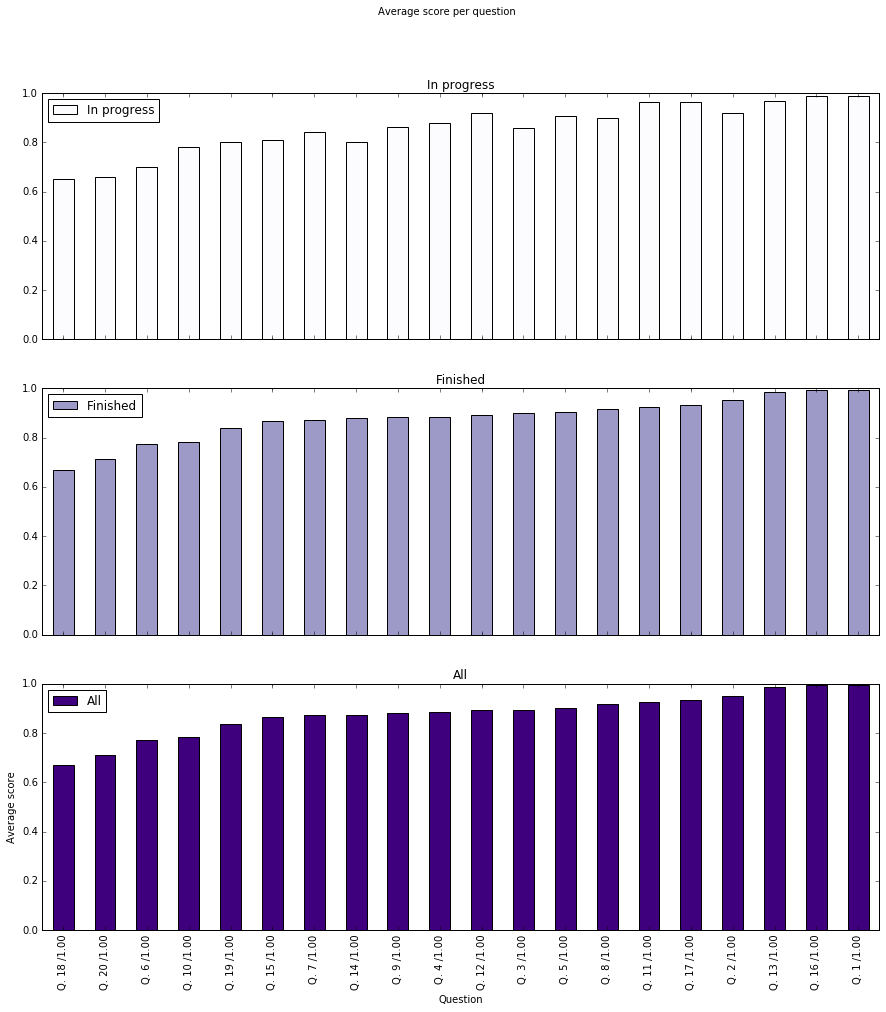

In [327]:
#fig = plt.figure(figsize=(8, 10)) # Make the whole figure big enough to see the individual graphs.

#fig.suptitle("Mean scores", fontsize='x-large')

#now we can pivot on state, calculate the mean for all non-NA values, and just report on the question colums
#margins=true gives us a total column
avg_question_score = pd.pivot_table(icma_df, index=['State'], values=question_columns, aggfunc='mean', margins=True)

#we need to transpose the table, to get the questions on the bottom.
avg_question_score = avg_question_score.T
#we need to reset the index to be able to use the question column
avg_question_score.reset_index(inplace=True)
avg_question_score.rename(columns={'index':'Question'}, inplace = True)
#lets sort the results by average score to make it easier to interpret the graph
avg_question_score.sort_values(by='All', inplace=True)

#now we can plot the average score for each question
avg_question_score.plot.bar(title="Average score per question", 
                              x=['Question'],
                              y=['In progress', 'Finished', 'All'],
                              figsize=(15,15),
                              subplots=True,
                              colormap='Purples')
plt.xlabel('Question')
plt.ylabel('Average score')

Generate a bar chart that shows two columns for each question. One column should show the number of attempts at that question, the other column should show the mean score. You should rescale the number of question attempts to fit the range 0–1 so that the two types of data a visible on the same graph. 

Use only data from completed quiz attempts.

You may need to generate intermediate DataFrames as you go. 

In [270]:
# Enter your code here


## Analysis
What does these plots and summaries of the data tell you about which questions are harder?

**Write your answer here** _(150 words)_


# <a name="f"></a> f) Data investigation summary (5 marks)
([Contents](#contents))

Look back over the analysis you have produced. Summarise the main conclusions you have drawn from this work. Highlight how different results can be combined to deduce more about the dataset. Take note of these questions:

* What conclusions can you draw about how and when students answer the iCMAs, and any effects that may have on the quiz grade? 

* What are the differences between the completed and in progress quiz attempts?

If you were extending this exploration, how might you proceed? 

**Write your answer here**  _(400 words)_



# <a name="g"></a> g) Anonymisation and privacy (10 marks)
([Contents](#contents))

The raw data for this question contained students' full names, personal email addresses, OU computer usernames, and personal identifiers. Open University students, as part of their registration agreement, give permission to The Open University for their personal data to be used internally for analysis and research.

## i) (4 marks)
What issues would there be in releasing this data for analysis by TM351 students? What laws would govern the disclosure of this data, and would unredacted data release be legal? In what way are full names, email addresses, OU computer usernames, and personal identifiers "personal data"? What other information in the dataset could be used to identify individuals?

Justify your answers.

**Write your answer here**  _(300 words)_


## ii) (4 marks)
One approach to obscuring the data is to use a cryptographic hash function, such as MD5. Such a hash function is deterministic (each value always results in the same hash), one-way (the original value cannot be recovered from the hashed value), and collision-free (two different values will not generate the same hashed value). See the examples below:

In [271]:
import hashlib

print('TM351', hashlib.md5('TM351'.encode('ascii','ignore')).hexdigest())
print('TM352', hashlib.md5('TM352'.encode('ascii','ignore')).hexdigest())
print('tm351', hashlib.md5('tm351'.encode('ascii','ignore')).hexdigest())

TM351 f2b9934cd167c59b513af9157ea63b02
TM352 b379e8f5811f6f59e24a3f0f2307fe86
tm351 954ed12ba4dc405d3967e086b872f10d


This technique could be used easily with the iCMA data by applying such a hash function to some of the data (name, email address, personal identifier, OU username) and only releasing the hashed values. 

What form of anonymisation is this? 

What are the advantages and disadvantages of this approach? How could data, obscured in this way, be used to deanonyimise some or all of the data? 

(For information, the data in this released dataset had the personal identifiers replaced (masked) by randomly-generated keys. Nonce values for other personal information were generated deterministically from the new personal identifiers. These values were then hashed and stored.)

**Write your answer here**  _(250 words)_



## iii) (2 marks)
Give two other approaches that could be used to anonymise the iCMA data so it could be published for analysis? What are their disadvantages?

**Write your answer here**  _(200 words)_


### 45 marks in total